In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import datetime as dt


#On importe le jeu de données venant d'open food facts

#La base de données est trop grande pour être chargée en une fois, on va la charger par morceaux
mylist = []

for chunk in pd.read_csv('database.csv', sep='\t', chunksize=20000, low_memory=False):
    mylist.append(chunk)

data = pd.concat(mylist, axis= 0)
del mylist

In [2]:
#Affichons une partie de la base de données
print(data.shape)
data.head()

(2031090, 187)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#On veut supprimer les colonnes entièrement vides. Vérifions d'abord desquelles il s'agit
data_bis = data.dropna(axis = 1, how = 'all')

avant = set(data.columns.tolist())
apres = set(data_bis.columns.tolist())
print(avant-apres)

{'-myristic-acid_100g', '-melissic-acid_100g', '-arachidic-acid_100g', '-mead-acid_100g', '-nervonic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-elaidic-acid_100g', 'allergens_en', '-cerotic-acid_100g', '-linoleic-acid_100g', '-maltose_100g', '-capric-acid_100g', '-lauric-acid_100g', '-maltodextrins_100g', 'additives', '-stearic-acid_100g', '-alpha-linolenic-acid_100g', '-erucic-acid_100g', '-palmitic-acid_100g', '-eicosapentaenoic-acid_100g', 'cities', '-behenic-acid_100g', '-fructose_100g', 'ingredients_from_palm_oil', '-butyric-acid_100g', '-sucrose_100g', '-oleic-acid_100g', '-arachidonic-acid_100g', '-gamma-linolenic-acid_100g', '-gondoic-acid_100g', 'ingredients_that_may_be_from_palm_oil', '-docosahexaenoic-acid_100g', '-montanic-acid_100g', '-caprylic-acid_100g', '-lignoceric-acid_100g', 'no_nutriments', '-lactose_100g', '-glucose_100g', '-caproic-acid_100g'}


In [4]:
#Aucune ne concerne directement le Nutriscore, on peut les supprimer
data = data_bis
print(data.columns)
data.head()

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=148)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1630484064,2021-09-01T08:14:24Z,L.casei,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Vérifions combien il y a d'articles avec le Nutriscore renseigné
nbr = data.count()['nutriscore_score']
print(nbr, 'articles, soit',nbr*100/data.shape[0], '% des entrées')

725694 articles, soit 35.72928821470245 % des entrées


In [6]:
#Seules 35% des entrées ont le Nutriscore renseigné, supprimons le reste
data = data.dropna(subset=['nutriscore_score']).reset_index(drop = True)
print(data.shape)
data.head()

(725694, 148)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000001281,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000001885,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,NaN,...,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000002257,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506122,2018-03-08T10:48:42Z,1561463749,2019-06-25T11:55:49Z,Salade de macedoine de légumes,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#On veut désormais supprimer les colonnes qui contiennent trop de Nan (et donc pas assez de données)
#On commence par déterminer le taux de remplissage de chaque colonne
remplissage = data.count(axis=0)

#On renormalise pour avoir le pourcentage de données fournies pour chaque colonne
total = data.shape[0]
for i in range(data.shape[1]):
    remplissage.iloc[i] = remplissage.iloc[i]*100/total

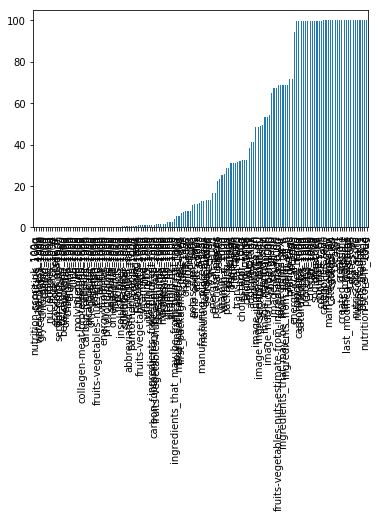

In [8]:
#On va ranger dans l'ordre et afficher les taux de remplissage, pour voir quel seuil appliquer pour filtrer nos données
remplissage.sort_values(inplace=True)
remplissage.plot(kind='bar')

In [9]:
#Beaucoup de colonnes semblent contenir plus de 80% de NaN (et donc n'ont des données que pour moins de 20% des articles)
#On va lister ces colonnes et vérifier si elles sont directement liées au Nutriscore
suppression = remplissage.where(remplissage < 20).dropna()

print(suppression.index)

Index(['nutrition-score-uk_100g', 'carnitine_100g', 'water-hardness_100g',
       'glycemic-index_100g', 'chlorophyl_100g', 'casein_100g', 'choline_100g',
       'nucleotides_100g', 'inositol_100g', 'ecoscore_score_fr',
       'ecoscore_grade_fr', 'serum-proteins_100g', 'beta-glucan_100g',
       'beta-carotene_100g', 'omega-9-fat_100g', 'chromium_100g',
       'taurine_100g', 'silica_100g', 'ph_100g', 'molybdenum_100g',
       'fluoride_100g', 'collagen-meat-protein-ratio_100g', 'caffeine_100g',
       'carbon-footprint_100g', 'bicarbonate_100g', 'omega-6-fat_100g',
       'starch_100g', 'chloride_100g', 'fruits-vegetables-nuts-dried_100g',
       'biotin_100g', 'vitamin-k_100g', 'energy-from-fat_100g',
       'phylloquinone_100g', 'iodine_100g', 'selenium_100g',
       'omega-3-fat_100g', 'vitamin-e_100g', 'polyols_100g',
       'insoluble-fiber_100g', 'manganese_100g', 'soluble-fiber_100g',
       'copper_100g', 'abbreviated_product_name', 'pantothenic-acid_100g',
       'cocoa_100g

In [10]:
#On va vérifier si 'nutrition-score-uk_100g' contient assez de données intéressantes pour notre application,
#puisqu'elle semble y être liée. Les autres pourront être supprimées sans encombres
print(remplissage['nutrition-score-uk_100g']*total/100)

0.0


In [11]:
#Elle ne contient aucune donnée ! On peut donc supprimer toute la liste précédente pour épurer notre base de données
data = data.drop(suppression.index.tolist(), axis=1)

In [12]:
print(data.shape)
#Affichons aussi les colonnes restantes
print(data.columns)

(725694, 67)
Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories',
       'categories_tags', 'categories_en', 'labels', 'labels_tags',
       'labels_en', 'stores', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'allergens', 'serving_size', 'serving_quantity',
       'additives_n', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'states', 'states_tags', 'states_en', 'brand_owner', 'main_category',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat

In [13]:
#On va supprimer certaines colonnes qui ne nous intéresseront pas pour l'étude du Nutriscore
data = data.drop(columns=['code', 'url', 'creator', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'packaging', 'packaging_tags', 'stores', 'serving_size',
       'serving_quantity', 'brand_owner', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'states', 'states_tags', 'states_en',])
print(data.columns)
print(data.shape)

Index(['created_t', 'product_name', 'quantity', 'brands', 'brands_tags',
       'categories', 'categories_tags', 'categories_en', 'labels',
       'labels_tags', 'labels_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'allergens', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_en', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')
(725694, 46)


In [14]:
#On veut désormais supprimer les doublons parmi les entrées

#Pour cela on va trier les entrées selon la date de création, et comparer les noms des produits pour trouver des doublons
data = data.sort_values('created_t').drop_duplicates("product_name", keep = "last").reset_index(drop = True)

print(data.shape)

(483000, 46)


In [15]:
data.head()

,created_t,product_name,quantity,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,1328021038,Caramels tendres au beurre salé au sel de Guér...,100 g,Carabreizh,carabreizh,"Groceries, Snacks, Sweet snacks, Confectioneri...","en:groceries,en:snacks,en:sweet-snacks,en:conf...","Groceries,Snacks,Sweet snacks,Confectioneries,...",en:produced-in-bretagne,en:produced-in-brittany,...,NaN,3.0,1.7000,0.68000,NaN,NaN,NaN,NaN,0.0,28.0
1,1328783696,Jacquet Les bouchées créatives à garnir,54 g,Jacquet,jacquet,"Snacks, Snacks salés, Apéritif, Biscuits apéri...","en:snacks,en:salty-snacks,en:appetizers,en:cra...","Snacks,Salty snacks,Appetizers,Crackers",en:palm-oil-free,en:no-palm-oil,...,3.0,8.5,1.7526,0.70104,NaN,NaN,NaN,NaN,0.0,10.0
2,1328972843,Lulu la barquette fraise,120 g,LU,lu,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Sans colorants, en:made-in-france","en:made-in-france,en:sans-colorants",...,1.7,3.8,0.0900,0.03600,NaN,NaN,NaN,NaN,27.8,13.0
3,1328986318,Cookies tout chocolat Biocoop,200 g,Biocoop,biocoop,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Bio, Bio européen, Commerce équitable, Fabriqu...","en:organic,en:eu-organic,en:fair-trade,en:made...",...,5.5,7.0,0.3810,0.15240,NaN,NaN,NaN,NaN,0.0,19.0
4,1329035567,Milka Ganze Nuss,100 g,Milka,milka,"Snacks,Sweet snacks,Cocoa and its products,Cho...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Cho...","Cocoa Life,Made in Germany,Pure cocoa butter","en:cocoa-life,en:made-in-germany,en:pure-cocoa...",...,2.0,8.4,0.3000,0.12000,NaN,NaN,NaN,NaN,20.0,25.0


In [16]:
print(data.columns)

Index(['created_t', 'product_name', 'quantity', 'brands', 'brands_tags',
       'categories', 'categories_tags', 'categories_en', 'labels',
       'labels_tags', 'labels_en', 'countries', 'countries_tags',
       'countries_en', 'ingredients_text', 'allergens', 'additives_n',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_en', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')


In [17]:
#De la même manière certaines colonnes sont redondantes et peuvent être supprimées.
#Nous allons vérifier combien d'entrées elles contiennent (pour voir si elles sont comparables)
redondants = ['brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'labels',
       'labels_tags', 'labels_en', 'countries', 'countries_tags', 'countries_en', 'additives_n',
       'additives_tags', 'additives_en', 'nutriscore_score', 'nutrition-score-fr_100g', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'main_category_en', 'energy-kcal_100g', 'energy_100g', 'salt_100g', 'sodium_100g']
print(data[redondants].count())

brands                     357963
brands_tags                357956
categories                 482999
categories_tags            482999
categories_en              482999
labels                     159237
labels_tags                159228
labels_en                  159228
countries                  482238
countries_tags             482238
countries_en               482238
additives_n                351186
additives_tags             216618
additives_en               216618
nutriscore_score           483000
nutrition-score-fr_100g    483000
pnns_groups_1              483000
pnns_groups_2              483000
main_category              482999
main_category_en           482999
energy-kcal_100g           453629
energy_100g                481784
salt_100g                  482007
sodium_100g                482007
dtype: int64


In [18]:
data[redondants].head()

,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,countries,countries_tags,...,nutriscore_score,nutrition-score-fr_100g,pnns_groups_1,pnns_groups_2,main_category,main_category_en,energy-kcal_100g,energy_100g,salt_100g,sodium_100g
0,Carabreizh,carabreizh,"Groceries, Snacks, Sweet snacks, Confectioneri...","en:groceries,en:snacks,en:sweet-snacks,en:conf...","Groceries,Snacks,Sweet snacks,Confectioneries,...",en:produced-in-bretagne,en:produced-in-brittany,Produced in Brittany,France,en:france,...,28.0,28.0,Sugary snacks,Sweets,en:salted-butter-caramels,Salted butter caramels,NaN,1717.0,1.7000,0.68000
1,Jacquet,jacquet,"Snacks, Snacks salés, Apéritif, Biscuits apéri...","en:snacks,en:salty-snacks,en:appetizers,en:cra...","Snacks,Salty snacks,Appetizers,Crackers",en:palm-oil-free,en:no-palm-oil,No palm oil,France,en:france,...,10.0,10.0,Salty snacks,Appetizers,en:crackers,Crackers,NaN,1898.0,1.7526,0.70104
2,LU,lu,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Sans colorants, en:made-in-france","en:made-in-france,en:sans-colorants","Made in France,Sans-colorants","Belgium,Canada,France,Switzerland","en:belgium,en:canada,en:france,en:switzerland",...,13.0,13.0,Sugary snacks,Biscuits and cakes,fr:barquettes-a-la-fraise,fr:Barquettes à la fraise,351.0,1487.0,0.0900,0.03600
3,Biocoop,biocoop,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Bio, Bio européen, Commerce équitable, Fabriqu...","en:organic,en:eu-organic,en:fair-trade,en:made...","Organic,EU Organic,Fair trade,Made in France,A...",France,en:france,...,19.0,19.0,Sugary snacks,Biscuits and cakes,en:chocolate-biscuits,Chocolate biscuits,NaN,2040.0,0.3810,0.15240
4,Milka,milka,"Snacks,Sweet snacks,Cocoa and its products,Cho...","en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Cho...","Cocoa Life,Made in Germany,Pure cocoa butter","en:cocoa-life,en:made-in-germany,en:pure-cocoa...","Cocoa Life,Made in Germany,Pure cocoa butter","Austria,Algeria,Germany,France,Switzerland","en:algeria,en:austria,en:france,en:germany,en:...",...,25.0,25.0,Sugary snacks,Chocolate products,en:milk-chocolates,Milk chocolates,555.0,2316.0,0.3000,0.12000


In [19]:
#les colonnes contenant les "tags" seront plus simples à manipuler (même langue, pas de problèmes de casse
#ou de variations d'orthographe), donc on conserve ces colonnes si possible. Sinon on conserve celle avec le plus de données
#(choix arbitraire si égalité)
data = data.drop(columns = ['brands', 'categories', 'categories_en', 'labels',
       'labels_en', 'countries', 'countries_en', 'main_category_en'])

In [20]:
#Les colonnes sur les additifs n'ont pas du tout le même nombre d'entrées, regardons si elles concernent bien la même chose
data[['additives_n', 'additives_tags', 'additives_en']].head()

,additives_n,additives_tags,additives_en
0,2.0,"en:e322,en:e322i,en:e500,en:e500ii","E322 - Lecithins,E322i - Lecithin,E500 - Sodiu..."
1,1.0,en:e920,E920 - L-cysteine hydrochloride
2,2.0,"en:e330,en:e440","E330 - Citric acid,E440 - Pectins"
3,2.0,"en:e322,en:e322i,en:e503,en:e503i","E322 - Lecithins,E322i - Lecithin,E503 - Ammon..."
4,1.0,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin"


In [21]:
#'additives_n' contient le nombre d'additifs, ce qui explique pourquoi elle est parfois remplie quand les deux autres sont vides
data = data.drop(columns = ['additives_en'])

In [22]:
#Vérifions que les deux colonnes Nutriscore contiennent les mêmes données
data[data['nutriscore_score'] != data['nutrition-score-fr_100g']]

,created_t,product_name,quantity,brands_tags,categories_tags,labels_tags,countries_tags,ingredients_text,allergens,additives_n,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g


In [23]:
#Ces deux colonnes sont les mêmes, n'en gardons qu'une
data = data.drop(columns = ['nutrition-score-fr_100g'])

In [24]:
#De même comparons "salt_100g" et "sodium_100g". Ne conservons que les données non aberrantes pour cette comparaison
comparaison = data[data['salt_100g'] <= 100]
#Affichons-les à l'écran
print(comparaison[['salt_100g', 'sodium_100g']])

        salt_100g  sodium_100g
0          1.7000      0.68000
1          1.7526      0.70104
2          0.0900      0.03600
3          0.3810      0.15240
4          0.3000      0.12000
5          0.7000      0.28000
6          0.0000      0.00000
7          0.5588      0.22352
8          0.0000      0.00000
9          0.0100      0.00400
10         0.9000      0.36000
11         1.0000      0.40000
12         1.2700      0.50800
13         0.0000      0.00000
14         0.0000      0.00000
15         0.0000      0.00000
16         0.0200      0.00800
17         0.3000      0.12000
18         0.0000      0.00000
19         1.0000      0.40000
20         1.0000      0.40000
21         1.2000      0.48000
22         0.3425      0.13700
23         0.0000      0.00000
24         0.7000      0.28000
25         1.8000      0.72000
26         0.0000      0.00000
27         0.0200      0.00800
28         0.1000      0.04000
29         1.0000      0.40000
...           ...          ...
482969  

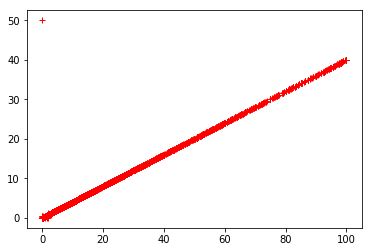

In [25]:
#Il semble y avoir un lien de propotionnalité entre les deux. Vérifions cela via un plot
plt.plot(comparaison['salt_100g'].tolist(), comparaison['sodium_100g'].tolist(), 'r+ ')

In [26]:
#Ces deux colonnes sont donc les mêmes (à un facteur multiplicatif près), n'en gardons qu'une
data = data.drop(columns = ['sodium_100g'])

        energy-kcal_100g  energy_100g
2                  351.0       1487.0
4                  555.0       2316.0
5                  256.0       1061.0
6                   44.0        184.0
7                  467.0       1954.0
8                  354.0       1480.0
9                  350.0       1464.0
10                 277.0       1147.0
11                 230.0        951.0
13                  40.0        167.0
14                  48.0        201.0
15                 399.0       1669.0
16                 360.0       1506.0
17                 538.0       2239.0
18                 532.0       2226.0
19                 165.0        690.0
20                 223.0        933.0
21                 248.0       1038.0
22                 501.0       2096.0
23                  64.0        268.0
24                 160.0        614.0
25                 239.0       1000.0
26                 135.0        565.0
27                 352.0       1474.0
28                  48.0        201.0
29          

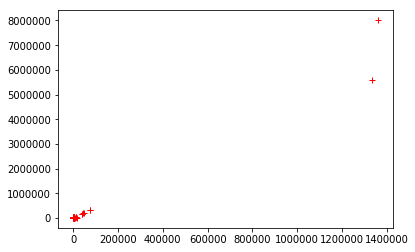

In [27]:
#Il y a deux colonnes portant sur l'énergie, ce doit être une conversion entre Joules et kiloCalories
echantillon = data[(data['energy-kcal_100g']> 0) & (data['energy_100g']>0)][['energy-kcal_100g', 'energy_100g']]
print(echantillon)
#Si c'est le cas, il devrait y avoir une simple relation de proportionnalité entre les deux
#echantillon.sort_values('energy-kcal_100g',inplace=True)
plt.plot(echantillon['energy-kcal_100g'].tolist(), echantillon['energy_100g'].tolist(), 'r+ ')

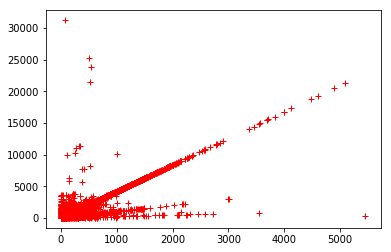

In [28]:
#on va enlever les valeurs aberrantes pour y voir plus clair
echantillon = echantillon[echantillon['energy-kcal_100g']<10000]
plt.plot(echantillon['energy-kcal_100g'].tolist(), echantillon['energy_100g'].tolist(), 'r+ ')

In [29]:
#Il semble qu'il y ait plusieurs coefficients de proportionnalité différents selon le sous-échantillon
#Il est probable que 'energy_100g' n'ait pas toutes ses entrées données avec la même unité, nous garderons donc
#la colonne en kilocalories
data = data.drop(columns = ['energy_100g'])
print(data.columns)

Index(['created_t', 'product_name', 'quantity', 'brands_tags',
       'categories_tags', 'labels_tags', 'countries_tags', 'ingredients_text',
       'allergens', 'additives_n', 'additives_tags',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'main_category', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')


In [30]:
#On peut encore retirer certaines colonnes qui ne serviront pas dans l'exploitation
data = data.drop(columns = ['created_t', 'quantity', 'brands_tags', 'countries_tags', 'ingredients_text',
       'allergens', 'additives_n', 'additives_tags', 'ingredients_from_palm_oil_n', 'trans-fat_100g', 'main_category',
       'ingredients_that_may_be_from_palm_oil_n', 'cholesterol_100g', 'carbohydrates_100g', 'categories_tags',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g','iron_100g', 'nova_group'])
print(data.shape)
data.head()

(483000, 14)


,product_name,labels_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Caramels tendres au beurre salé au sel de Guér...,en:produced-in-brittany,28.0,e,Sugary snacks,Sweets,NaN,10.9,7.0,49.3,NaN,3.0,1.7000,0.0
1,Jacquet Les bouchées créatives à garnir,en:no-palm-oil,10.0,c,Salty snacks,Appetizers,NaN,15.5,1.3,2.0,3.0,8.5,1.7526,0.0
2,Lulu la barquette fraise,"en:made-in-france,en:sans-colorants",13.0,d,Sugary snacks,Biscuits and cakes,351.0,2.0,0.6,58.0,1.7,3.8,0.0900,27.8
3,Cookies tout chocolat Biocoop,"en:organic,en:eu-organic,en:fair-trade,en:made...",19.0,e,Sugary snacks,Biscuits and cakes,NaN,25.0,14.0,33.0,5.5,7.0,0.3810,0.0
4,Milka Ganze Nuss,"en:cocoa-life,en:made-in-germany,en:pure-cocoa...",25.0,e,Sugary snacks,Chocolate products,555.0,36.0,15.0,47.0,2.0,8.4,0.3000,20.0


In [31]:
#On veut supprimer les données qui sont aberrantes

#On crée une fonction qui supprime les données hors de l'intervalle [minimum, maximum] pour les colonnes listées en paramètres
def suppression_aberrantes(data, colonnes, minimum, maximum):
    for c in colonnes: 
        data[c].where(data[c] >= minimum, inplace=True)
        data[c].where(data[c] <= maximum, inplace=True)
    return(data)

In [32]:
print(data.columns)

Index(['product_name', 'labels_tags', 'nutriscore_score', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'fruits-vegetables-nuts-estimate-from-ingredients_100g'],
      dtype='object')


In [33]:
#On liste les colonnes où les données doivent être dans l'intervalle [0,100]
cols_0_100 = ['fat_100g', 'saturated-fat_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g']
#On affiche combien de données non NaN sont présentes avant la suppression
print(data[cols_0_100].count())
#puis on supprime les grandeurs aberrantes
suppression_aberrantes(data,cols_0_100,0,100)
#avant d'afficher le nombre de données non NaN après suppression pour comparaison
print(data[cols_0_100].count())

fat_100g                                                 481767
saturated-fat_100g                                       481737
sugars_100g                                              481751
fiber_100g                                               277829
proteins_100g                                            481767
salt_100g                                                482007
fruits-vegetables-nuts-estimate-from-ingredients_100g    351077
dtype: int64
fat_100g                                                 481755
saturated-fat_100g                                       481727
sugars_100g                                              481731
fiber_100g                                               277812
proteins_100g                                            481752
salt_100g                                                481813
fruits-vegetables-nuts-estimate-from-ingredients_100g    350481
dtype: int64


In [34]:
#L'énergie dans 100g des produits qutotidiens semble être comprise entre 0 et 600 kcal. 
#On va supprimer les données > 1000kcal pour l'instant (on affinera l'intervalle lors de l'exploitation)
#On affiche combien de données non NaN sont présentes avant la suppression
print(data[['energy-kcal_100g']].count())
#puis on supprime les grandeurs aberrantes
suppression_aberrantes(data,['energy-kcal_100g'],0,1000)
#avant d'afficher le nombre de données non NaN après suppression pour comparaison
print(data[['energy-kcal_100g']].count())

energy-kcal_100g    453629
dtype: int64
energy-kcal_100g    452961
dtype: int64


In [35]:
#Même travail pour la colonne du Nutriscore, qui doit être compris entre -15 et 40
#On affiche combien de données non NaN sont présentes avant la suppression
print(data[['nutriscore_score']].count())
#puis on supprime les grandeurs aberrantes
suppression_aberrantes(data,['nutriscore_score'],-15,40)
#avant d'afficher le nombre de données non NaN après suppression pour comparaison
print(data[['nutriscore_score']].count())
#On ne conservera pas ces données exclues, puisque nous avons besoin du Nutriscore
data = data.dropna(subset=['nutriscore_score']).reset_index(drop = True)

nutriscore_score    483000
dtype: int64
nutriscore_score    483000
dtype: int64


In [36]:
data.head()

,product_name,labels_tags,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Caramels tendres au beurre salé au sel de Guér...,en:produced-in-brittany,28.0,e,Sugary snacks,Sweets,NaN,10.9,7.0,49.3,NaN,3.0,1.7000,0.0
1,Jacquet Les bouchées créatives à garnir,en:no-palm-oil,10.0,c,Salty snacks,Appetizers,NaN,15.5,1.3,2.0,3.0,8.5,1.7526,0.0
2,Lulu la barquette fraise,"en:made-in-france,en:sans-colorants",13.0,d,Sugary snacks,Biscuits and cakes,351.0,2.0,0.6,58.0,1.7,3.8,0.0900,27.8
3,Cookies tout chocolat Biocoop,"en:organic,en:eu-organic,en:fair-trade,en:made...",19.0,e,Sugary snacks,Biscuits and cakes,NaN,25.0,14.0,33.0,5.5,7.0,0.3810,0.0
4,Milka Ganze Nuss,"en:cocoa-life,en:made-in-germany,en:pure-cocoa...",25.0,e,Sugary snacks,Chocolate products,555.0,36.0,15.0,47.0,2.0,8.4,0.3000,20.0


In [37]:
#Au final on enregistre notre base de données nettoyée pour l'exploitation ultérieure
data.to_csv(path_or_buf='database_clean.csv', index = False)